# Context
Phase three of this project is data cleanup and dimensionality reduction.\
This notebook drives this process for the data that went through the
transformations in PH2.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../project.env")
sys.path.append(os.environ["PYTHONPATH"])

import pickle

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
import PH3header as ph3



Chosen class grouping: all-classes


Directory /Users/diego/Desktop/iteso/TOG/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/src exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/scores exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH1/all-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH2/all-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes does not exist. Creating it and continuing with execution


In [3]:
PH3_IS_W2 = True

if PH3_IS_W2:
  prePH3_ROOT = sup.PH2_DATA_ROOT
  PH3_SUB_DATA_ROOT = os.path.join(sup.PH3_DATA_ROOT, sup.PH3_W2_CODE)
  PH3_SUB_BINGEN_ROOT = os.path.join(sup.PH3_BINGEN_ROOT, sup.PH3_W2_CODE)
  PH3_SUB_MEDIAGEN_ROOT = os.path.join(sup.PH3_MEDIAGEN_ROOT, sup.PH3_W2_CODE)
else:
  prePH3_ROOT = sup.PH1_DATA_ROOT
  PH3_SUB_DATA_ROOT = os.path.join(sup.PH3_DATA_ROOT, sup.PH3_WO2_CODE)
  PH3_SUB_BINGEN_ROOT = os.path.join(sup.PH3_BINGEN_ROOT, sup.PH3_WO2_CODE)
  PH3_SUB_MEDIAGEN_ROOT = os.path.join(sup.PH3_MEDIAGEN_ROOT, sup.PH3_WO2_CODE)

sup.report_dir_if_not_exists(prePH3_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_DATA_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_BINGEN_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_MEDIAGEN_ROOT)

Directory /Users/diego/Desktop/iteso/TOG/data/PH2/all-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2 does not exist. Creating it and continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2 exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/w2 does not exist. Creating it and continuing with execution


# Source dataframe loading

In [4]:
import pandas as pd

## Active hand detection

In [5]:
prePH3_ah_frame_df = pd.read_csv(os.path.join(prePH3_ROOT, f"{sup.DATA_AH_PF}.csv"))
prePH3_ah_frame_df

,fileid,person_id,cycle_num,handedness,class_name,class_numeric,current_frame,active_hand,h_mean_x,h_mean_y,...,cp0z,cp11x,cp11y,cp11z,cp12x,cp12y,cp12z,cp_h_mean_x,cp_h_mean_y,cp_h_mean_z
0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,0,1,0.402325,0.431794,...,-0.130771,-1.790365,0.758362,0.060317,-1.957494,1.462776,-0.587015,-2.402462,0.948084,-0.124299
1,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,0,0,0.564077,0.991533,...,-0.130771,-3.036731,0.842753,0.349662,-1.957494,1.462776,-0.587015,-2.042705,1.020513,-0.073060
2,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,1,1,0.398845,0.437636,...,-0.187774,-1.858167,0.846123,0.018568,-1.968054,1.608527,-0.659838,-2.472514,1.049298,-0.177663
3,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,1,0,0.563614,0.992229,...,-0.187774,-3.137224,0.971932,0.272847,-1.968054,1.608527,-0.659838,-2.092982,1.108208,-0.114549
4,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,2,1,0.396001,0.443303,...,-0.135368,-1.946311,0.816087,0.073966,-2.090933,1.629638,-0.625052,-2.579638,1.040590,-0.133036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94294,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,9,1,0.615409,0.453786,...,-0.209412,-1.597262,1.062073,-0.057946,-1.483173,1.745201,-0.659519,-1.530058,1.183440,-0.091197
94295,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,10,1,0.626146,0.451569,...,-0.259935,-1.516973,1.103281,-0.110097,-1.360762,1.748590,-0.698988,-1.430187,1.181708,-0.109829
94296,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,10,0,0.426564,0.884752,...,-0.259935,-2.441346,1.395153,-0.035105,-1.360762,1.748590,-0.698988,-1.856482,1.201426,-0.245549
94297,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,11,1,0.647923,0.438531,...,-0.200455,-1.535220,1.089146,-0.062901,-1.425573,1.777704,-0.652256,-1.406661,1.201472,-0.065859


# Cleanup

## Identify numeric columns which will go through standardization and dimensionality reduction

In [6]:
if PH3_IS_W2:
  ah_pf_dataCols = sup.pf_wrist_hand_landmark_columns+sup.pf_chest_pose_landmark_columns+sup.pf_h_v123_columns
else:
  ah_pf_dataCols = sup.pf_hand_landmark_columns+sup.pf_pose_landmark_columns

## Standardize data

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
ah_pf_scaler = StandardScaler()

PH3_AH_FRM_std_df = prePH3_ah_frame_df[sup.tag_columns+sup.class_columns+[sup.current_frame_col]]
PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(prePH3_ah_frame_df[ah_pf_dataCols])

PH3_AH_FRM_std_df

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_13183/683750519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(prePH3_ah_frame_df[ah_pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_13183/683750519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(prePH3_ah_frame_df[ah_pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_1

,fileid,person_id,cycle_num,handedness,class_name,class_numeric,active_hand,current_frame,wh0x,wh0y,...,cp_h_mean_z,h_v1x,h_v1y,h_v1z,h_v2x,h_v2y,h_v2z,h_v3x,h_v3y,h_v3z
0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,1,0,0.764931,-0.869697,...,-0.610846,-0.718286,-1.011850,0.622484,0.172395,-1.204542,0.918273,-0.075812,0.217842,1.430241
1,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,0,0,1.438077,0.608766,...,-0.307267,-0.528880,1.262229,0.320259,0.390640,1.085767,0.747229,0.290936,0.100973,-0.544601
2,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,1,1,0.754297,-0.842547,...,-0.927016,-0.745811,-1.005389,0.541569,0.160539,-1.202225,0.825680,-0.080220,0.175392,1.445425
3,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,0,1,1.454867,0.676935,...,-0.553078,-0.548675,1.257727,0.274679,0.369814,1.084536,0.681451,0.279053,0.077734,-0.542951
4,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,1,2,0.721256,-0.860867,...,-0.662608,-0.790901,-1.000581,0.558852,0.140087,-1.202599,0.817279,-0.053337,0.168426,1.473385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94294,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,9,0.983822,-1.610837,...,-0.414721,-0.701893,-0.994310,0.248982,0.035266,-1.181175,0.314373,-0.058223,0.791740,-0.375124
94295,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,10,0.930248,-1.254576,...,-0.525113,-0.362635,-1.026644,0.313071,0.485030,-1.163597,0.378780,-0.112899,0.783762,-0.458082
94296,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,0,10,-0.168219,1.394807,...,-1.329222,1.238587,0.465177,-2.230845,-0.456232,0.794404,-1.668419,-1.990720,-1.928106,-0.663777
94297,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,11,1.069984,-0.828997,...,-0.264600,0.244309,-1.038525,0.477205,0.920017,-1.130301,0.684411,-0.014225,0.630915,-0.275613


## Save standardizers

In [9]:
with open(os.path.join(PH3_SUB_BINGEN_ROOT, f"scaler_{sup.DATA_AH_PF}.pkl"), 'wb') as f:
  pickle.dump(ah_pf_scaler, f)

# Dimensionality Reduction

## Helper functions

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import make_pipeline
from sklearn.kernel_approximation import Nystroem
from sklearn.decomposition import PCA
import umap.umap_ as umap

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
def flatten_video(group):
  data_cols = [col for col in group.columns if col not in 
                sup.tag_columns + sup.class_columns + [sup.current_frame_col]]

  flattened_dict = {}

  frame_list = []
  for _, row in group.iterrows():
      frame_num = int(row[sup.current_frame_col])
      frame_list.append(frame_num)
      prefix = f"f{frame_num}_"
      for col in data_cols:
          flattened_dict[prefix + col] = row[col]

  if frame_list != [i for i in range(12)]:
     print("Big probelm 2")
     print(frame_list)
     print(group.iloc[0][sup.tag_columns])

  # Add the group keys (the tags)
  group_keys = group.iloc[0][sup.tag_columns + sup.class_columns].to_dict()
  group_keys.update(flattened_dict)
  return pd.DataFrame([group_keys])

In [12]:
def visualize(origin_df, data_cols, data_unit, label_col, reducer_name, kernel_name=""):    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    if label_col == sup.active_hand_col:
        filtered_df = origin_df
    else:
        spf_df = origin_df[origin_df[sup.active_hand_col] == 1]
        if data_unit == sup.DATA_S_PF:
            filtered_df = spf_df
        elif data_unit == sup.DATA_S_PV:
            filtered_df = spf_df\
                .groupby(sup.tag_columns+sup.class_columns)\
                .apply(flatten_video).reset_index(drop=True)

    labels_cat = filtered_df[label_col].astype('category')
    categories = labels_cat.cat.categories
    cat_to_idx = {cat: i for i, cat in enumerate(categories)}
    colors = labels_cat.map(cat_to_idx)
    cmap = plt.cm.Spectral

    if reducer_name == sup.PH3_REDUCER_NAME_PCA:
        reducer = PCA(n_components=3, random_state=42)
    elif reducer_name == sup.PH3_REDUCER_NAME_UMAP:
        reducer = umap.UMAP(n_components=3, random_state=42)
    elif reducer_name == sup.PH3_REDUCER_NAME_KPCA:
        nystroem = Nystroem(kernel=kernel_name, gamma=0.5, n_components=500)
        reducer = make_pipeline(nystroem, PCA(n_components=3, random_state=42))

    if data_unit == sup.DATA_S_PV:
        filtered_data = reducer.fit_transform(filtered_df.drop(columns=sup.tag_columns+sup.class_columns))
    else:
        data = reducer.fit_transform(origin_df.drop(columns=sup.tag_columns+sup.class_columns+[sup.current_frame_col]))
        if label_col == sup.active_hand_col:
            filtered_data = data
        else:
            filtered_data = data[origin_df[sup.active_hand_col] == 1]
    
    sc = ax.scatter(filtered_data[:, 0], filtered_data[:, 1], filtered_data[:, 2], c=colors, cmap=cmap, s=20)

    for cat, idx in cat_to_idx.items():
        ax.scatter([], [], [], color=cmap(idx / (len(categories) - 1)), label=cat)
    ax.legend(title=label_col)

    figtitle = f"{reducer_name}-{kernel_name}-{data_unit}"
    ax.set_title(figtitle)

    PH3_SUB3_MEDIAGEN_ROOT = os.path.join(PH3_SUB_MEDIAGEN_ROOT, reducer_name, kernel_name)
    sup.create_dir_if_not_exists(PH3_SUB3_MEDIAGEN_ROOT)
    figpath = os.path.join(PH3_SUB3_MEDIAGEN_ROOT, f"{figtitle}.png")
    plt.savefig(figpath, dpi=300, bbox_inches='tight')

    plt.show()

def writeout(origin_df, data_cols, label_cols, reducer_name, kernel_name=""):
    for n in sup.PH3_N_CANDIDATES:
        if reducer_name == sup.PH3_REDUCER_NAME_PCA:
            reducer = PCA(n_components=n, random_state=42)
        elif reducer_name == sup.PH3_REDUCER_NAME_UMAP:
            reducer = umap.UMAP(n_components=n, random_state=42)
        elif reducer_name == sup.PH3_REDUCER_NAME_KPCA:
            nystroem = Nystroem(kernel=kernel_name, gamma=0.5, n_components=500)
            reducer = make_pipeline(nystroem, PCA(n_components=n, random_state=42))

        data = reducer.fit_transform(origin_df[data_cols])

        reduced_df = pd.DataFrame(data)
        reduced_df[sup.tag_columns+label_cols+[sup.current_frame_col]] = origin_df[sup.tag_columns+label_cols+[sup.current_frame_col]]

        PH3_SUB3_DATA_ROOT = os.path.join(PH3_SUB_DATA_ROOT, reducer_name, kernel_name)
        sup.create_dir_if_not_exists(PH3_SUB3_DATA_ROOT)
        PH3_SUB3_BINGEN_ROOT = os.path.join(PH3_SUB_BINGEN_ROOT, reducer_name, kernel_name)
        sup.create_dir_if_not_exists(PH3_SUB3_BINGEN_ROOT)

        reduced_df.to_csv(os.path.join(PH3_SUB3_DATA_ROOT, f"{sup.DATA_AH_PF}_{n}.csv"), index=False)
        with open(os.path.join(PH3_SUB3_BINGEN_ROOT, f"{sup.DATA_AH_PF}{n}.pkl"), 'wb') as f:
            pickle.dump(reducer, f)

## PCA

In [13]:
PH3_AH_FRM_PCA_df = PH3_AH_FRM_std_df.copy()

In [14]:
PH3_AH_FRM_PCA_df[PH3_AH_FRM_PCA_df['fileid'] == 'p01/Ciclo_3_5_Izquierda/Ciclo_3_5_Izquierda_n.mp4']

,fileid,person_id,cycle_num,handedness,class_name,class_numeric,active_hand,current_frame,wh0x,wh0y,...,cp_h_mean_z,h_v1x,h_v1y,h_v1z,h_v2x,h_v2y,h_v2z,h_v3x,h_v3y,h_v3z


### Active hand detection

#### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/w2/pca/ does not exist. Creating it and continuing with execution


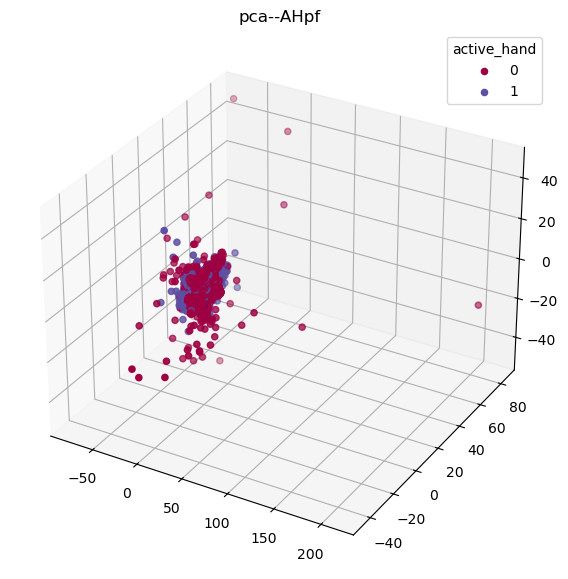

In [15]:
visualize(origin_df=PH3_AH_FRM_PCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_AH_PF, label_col=sup.active_hand_col, reducer_name=sup.PH3_REDUCER_NAME_PCA, kernel_name='')

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/w2/pca/ exists. Continuing with execution


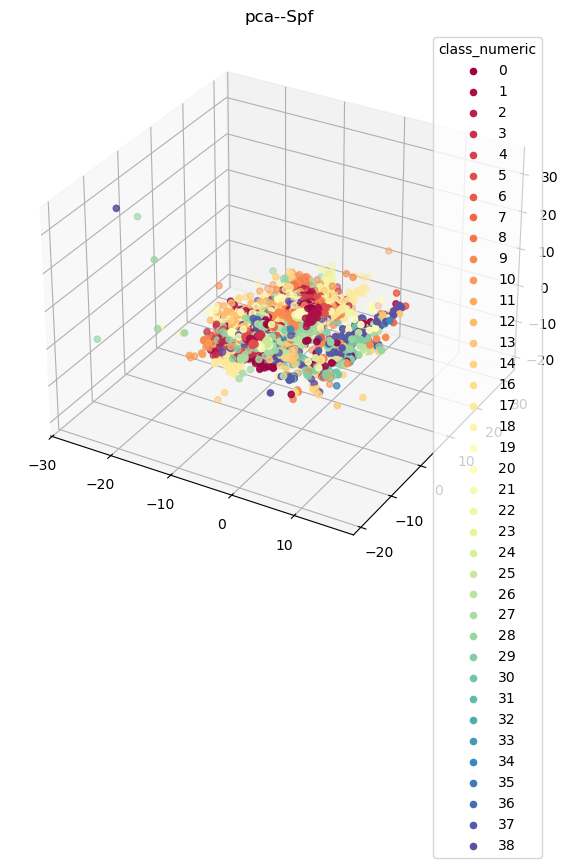

In [16]:
visualize(origin_df=PH3_AH_FRM_PCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PF, label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_PCA, kernel_name='')

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_13183/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/w2/pca/ exists. Continuing with execution


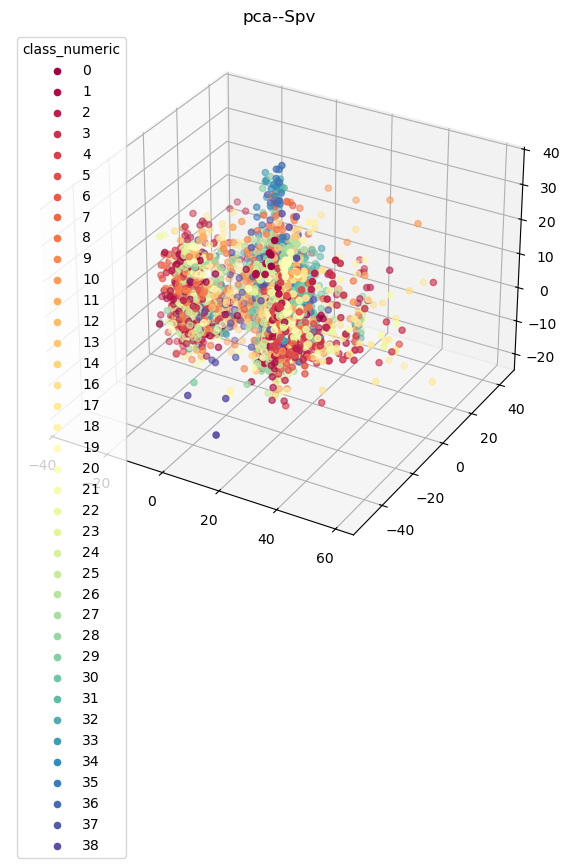

In [17]:
visualize(origin_df=PH3_AH_FRM_PCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PV, label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_PCA, kernel_name='')

#### Writeout

In [18]:
writeout(origin_df=PH3_AH_FRM_PCA_df, data_cols=ah_pf_dataCols, label_cols=sup.class_columns, reducer_name=sup.PH3_REDUCER_NAME_PCA, kernel_name='')

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/pca/ does not exist. Creating it and continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Deskt

## Kernel PCA

In [19]:
PH3_AH_FRM_KPCA_df = PH3_AH_FRM_std_df.copy()

### Active hand detection

In [20]:
PH3_AH_FRM_KPCA_df

,fileid,person_id,cycle_num,handedness,class_name,class_numeric,active_hand,current_frame,wh0x,wh0y,...,cp_h_mean_z,h_v1x,h_v1y,h_v1z,h_v2x,h_v2y,h_v2z,h_v3x,h_v3y,h_v3z
0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,1,0,0.764931,-0.869697,...,-0.610846,-0.718286,-1.011850,0.622484,0.172395,-1.204542,0.918273,-0.075812,0.217842,1.430241
1,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,0,0,1.438077,0.608766,...,-0.307267,-0.528880,1.262229,0.320259,0.390640,1.085767,0.747229,0.290936,0.100973,-0.544601
2,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,1,1,0.754297,-0.842547,...,-0.927016,-0.745811,-1.005389,0.541569,0.160539,-1.202225,0.825680,-0.080220,0.175392,1.445425
3,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,0,1,1.454867,0.676935,...,-0.553078,-0.548675,1.257727,0.274679,0.369814,1.084536,0.681451,0.279053,0.077734,-0.542951
4,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,29,1,2,0.721256,-0.860867,...,-0.662608,-0.790901,-1.000581,0.558852,0.140087,-1.202599,0.817279,-0.053337,0.168426,1.473385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94294,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,9,0.983822,-1.610837,...,-0.414721,-0.701893,-0.994310,0.248982,0.035266,-1.181175,0.314373,-0.058223,0.791740,-0.375124
94295,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,10,0.930248,-1.254576,...,-0.525113,-0.362635,-1.026644,0.313071,0.485030,-1.163597,0.378780,-0.112899,0.783762,-0.458082
94296,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,0,10,-0.168219,1.394807,...,-1.329222,1.238587,0.465177,-2.230845,-0.456232,0.794404,-1.668419,-1.990720,-1.928106,-0.663777
94297,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,11,1.069984,-0.828997,...,-0.264600,0.244309,-1.038525,0.477205,0.920017,-1.130301,0.684411,-0.014225,0.630915,-0.275613


#### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/w2/kpca/poly does not exist. Creating it and continuing with execution


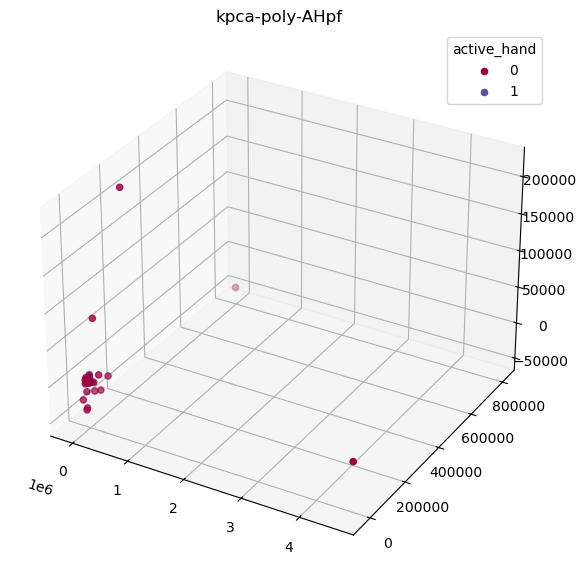

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/w2/kpca/rbf does not exist. Creating it and continuing with execution


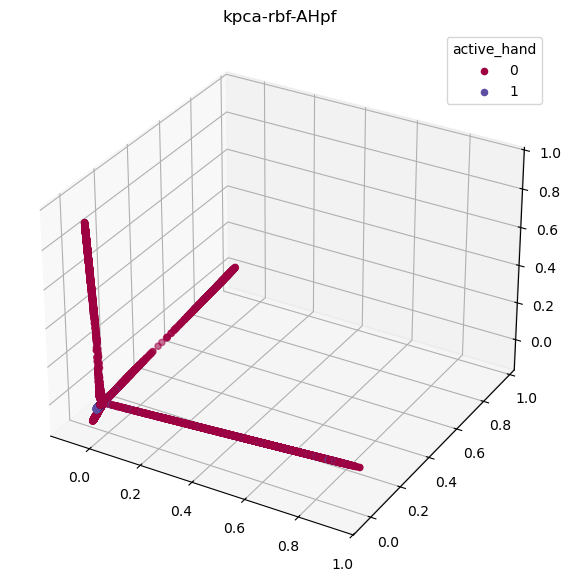

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/w2/kpca/sigmoid does not exist. Creating it and continuing with execution


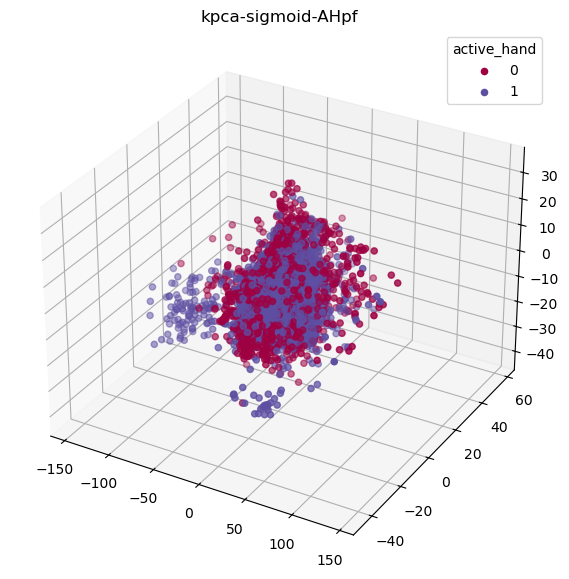

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/w2/kpca/cosine does not exist. Creating it and continuing with execution


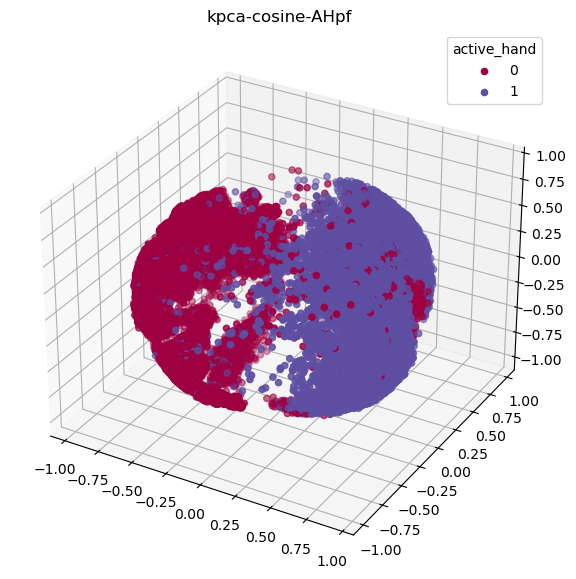

In [21]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  visualize(origin_df=PH3_AH_FRM_KPCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_AH_PF, label_col=sup.active_hand_col, reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/w2/kpca/poly exists. Continuing with execution


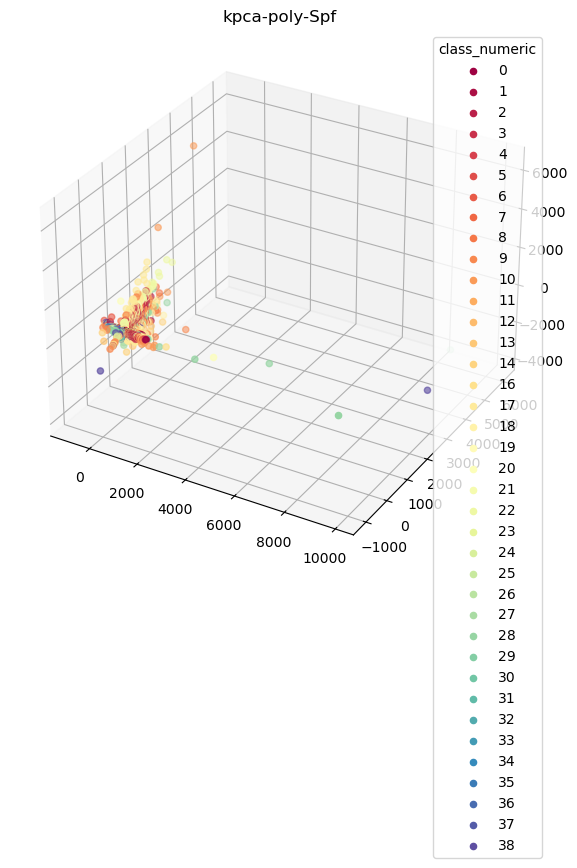

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/w2/kpca/rbf exists. Continuing with execution


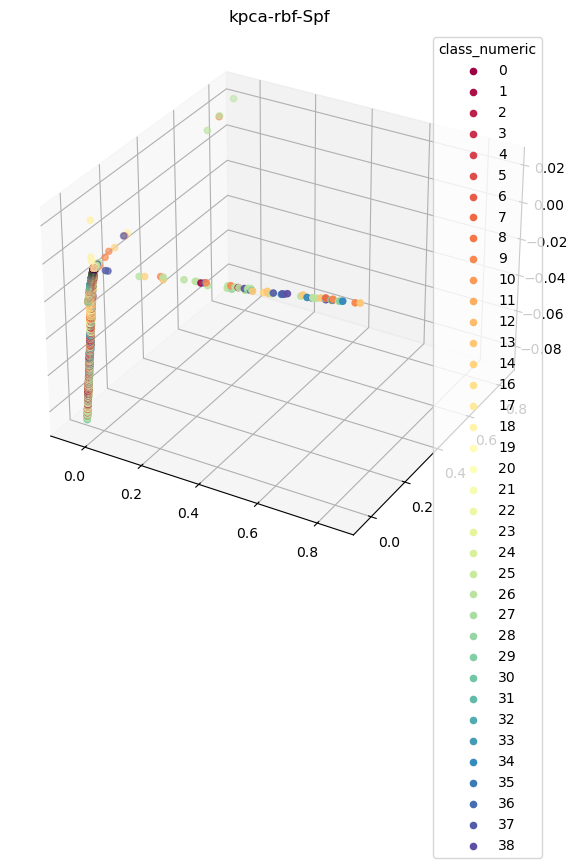

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/w2/kpca/sigmoid exists. Continuing with execution


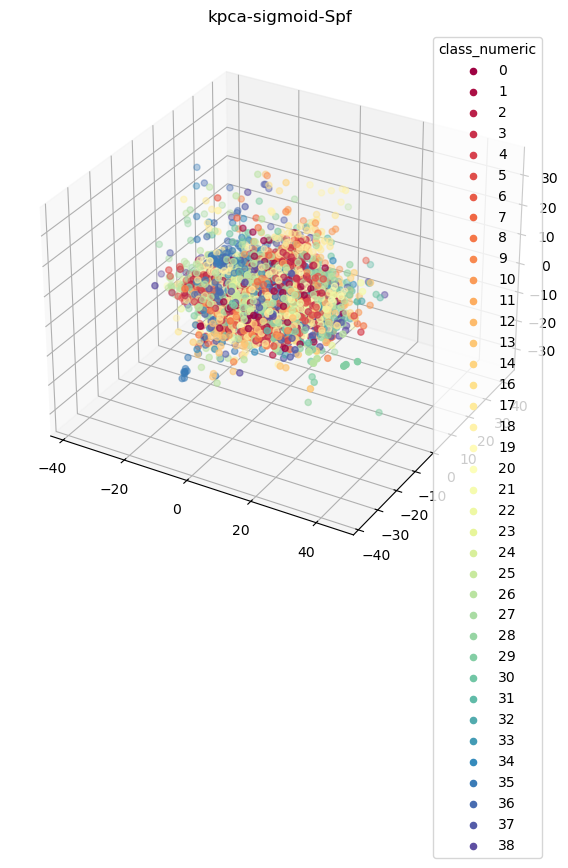

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/w2/kpca/cosine exists. Continuing with execution


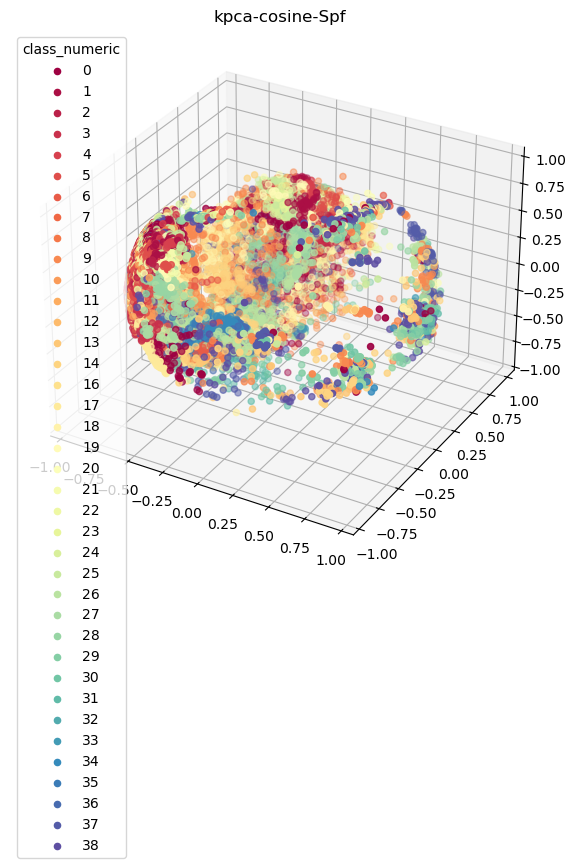

In [22]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  visualize(origin_df=PH3_AH_FRM_KPCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PF, label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_13183/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/w2/kpca/poly exists. Continuing with execution


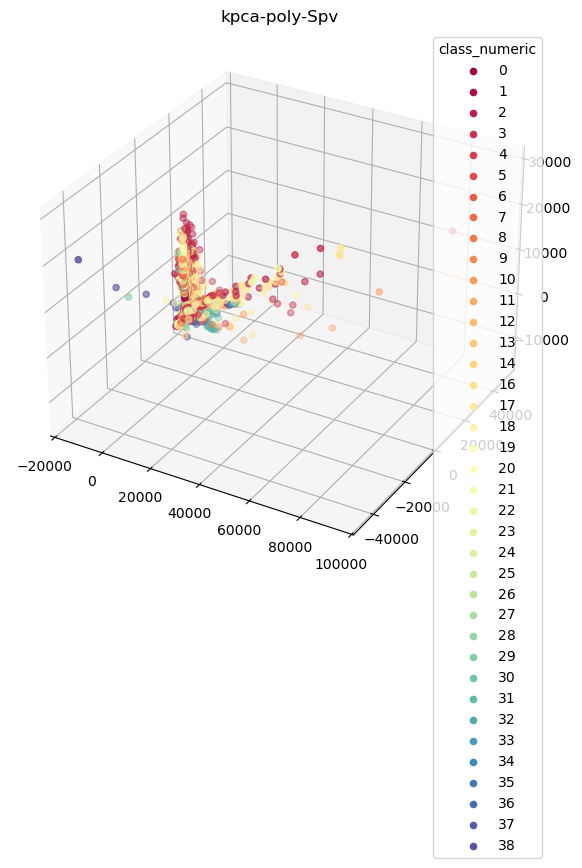

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_13183/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/w2/kpca/rbf exists. Continuing with execution


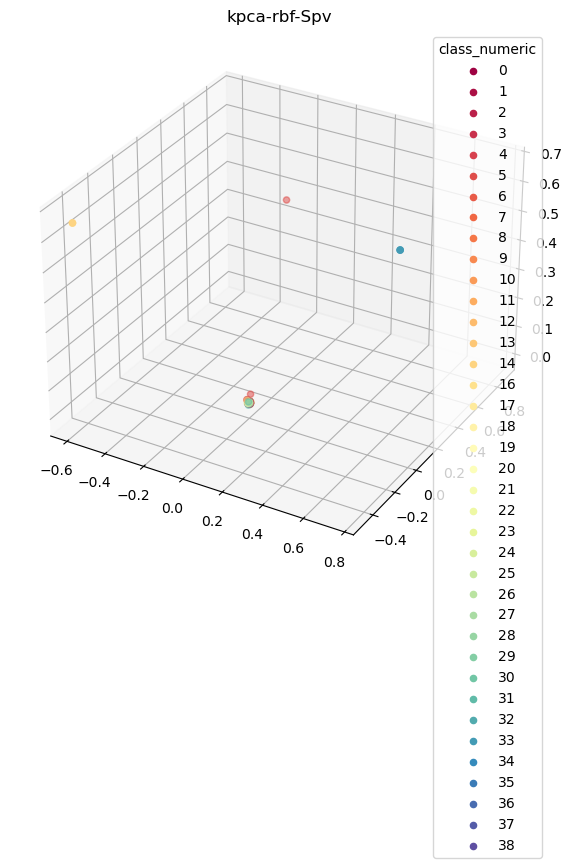

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_13183/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/w2/kpca/sigmoid exists. Continuing with execution


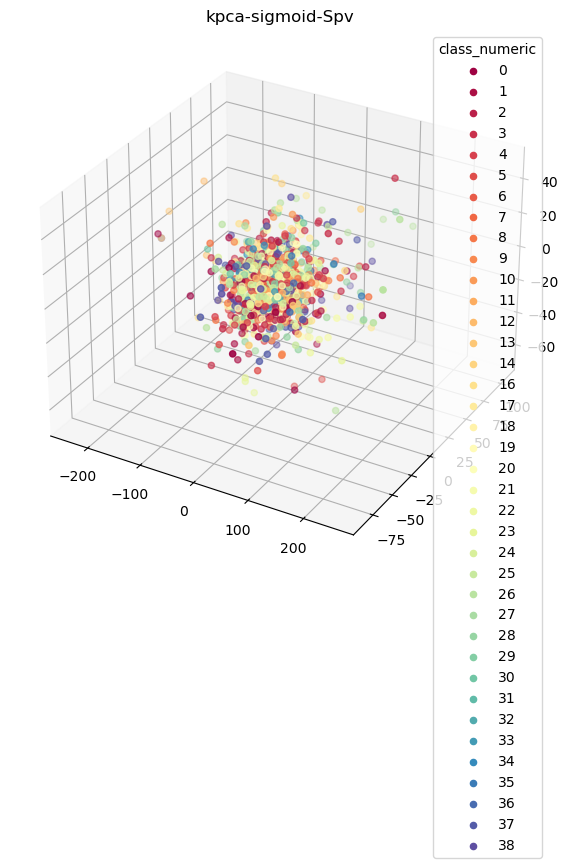

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_13183/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/w2/kpca/cosine exists. Continuing with execution


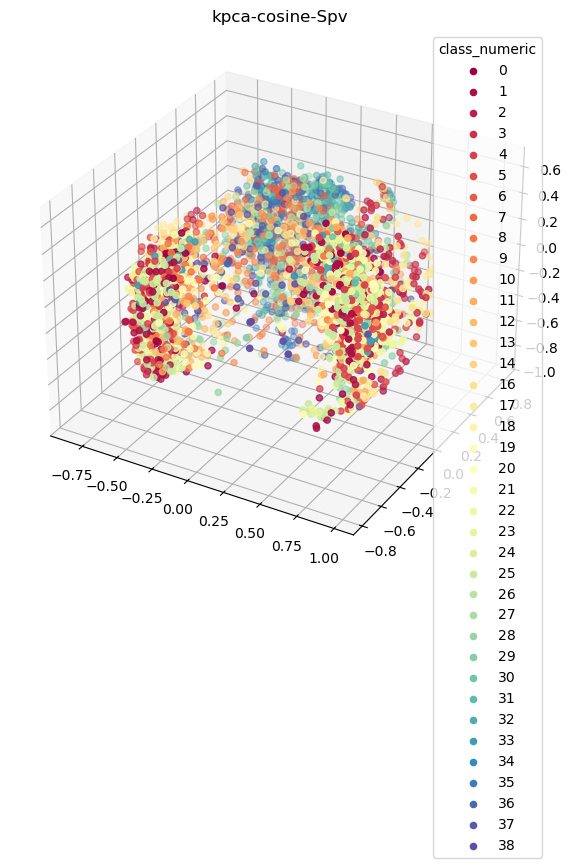

In [23]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  visualize(origin_df=PH3_AH_FRM_KPCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PV, label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

#### Writeout

In [24]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  writeout(origin_df=PH3_AH_FRM_KPCA_df, data_cols=ah_pf_dataCols, label_cols=sup.class_columns, reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/kpca/poly does not exist. Creating it and continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2/kpca/poly does not exist. Creating it and continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/kpc

## UMAP

In [25]:
PH3_AH_FRM_UMAP_df = PH3_AH_FRM_std_df.copy()

### Active hand detection

#### Exploration

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/w2/umap/ does not exist. Creating it and continuing with execution


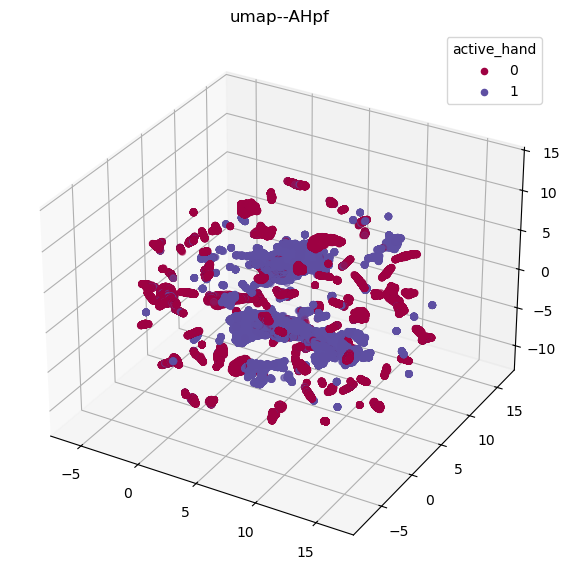

In [26]:
visualize(origin_df=PH3_AH_FRM_UMAP_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_AH_PF, label_col=sup.active_hand_col, reducer_name=sup.PH3_REDUCER_NAME_UMAP, kernel_name='')

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/w2/umap/ exists. Continuing with execution


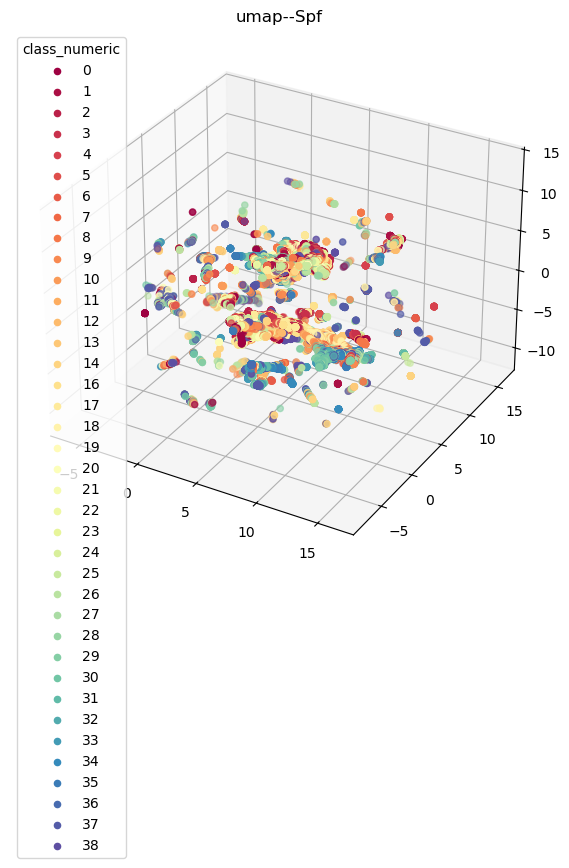

In [27]:
visualize(origin_df=PH3_AH_FRM_UMAP_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PF,label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_UMAP, kernel_name='')

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_13183/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/all-classes/w2/umap/ exists. Continuing with execution


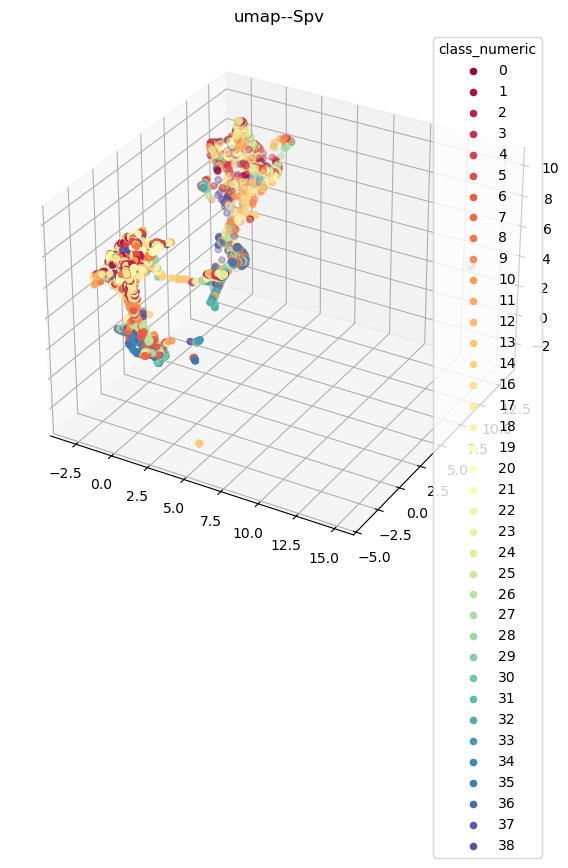

In [28]:
visualize(origin_df=PH3_AH_FRM_UMAP_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PV,label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_UMAP, kernel_name='')

#### Writeout

In [29]:
writeout(origin_df=PH3_AH_FRM_UMAP_df, data_cols=ah_pf_dataCols, label_cols=sup.class_columns, reducer_name=sup.PH3_REDUCER_NAME_UMAP, kernel_name='')

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/umap/ does not exist. Creating it and continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/all-classes/w2/umap/ exists. Continuing with execution
